In [1]:
pip install all_packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.express as px
import plotly.tools as tls
from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score

In [3]:
df = pd.read_csv("D:\AIDS\Sem IV\Food_Production\Food_Production.csv")

In [4]:
df.shape

(43, 23)

In [5]:
df.columns

Index(['Food product', 'Land use change', 'Animal Feed', 'Farm', 'Processing',
       'Transport', 'Packging', 'Retail', 'Total_emissions',
       'Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal)',
       'Eutrophying emissions per kilogram (gPO₄eq per kilogram)',
       'Eutrophying emissions per 100g protein (gPO₄eq per 100 grams protein)',
       'Freshwater withdrawals per 1000kcal (liters per 1000kcal)',
       'Freshwater withdrawals per 100g protein (liters per 100g protein)',
       'Freshwater withdrawals per kilogram (liters per kilogram)',
       'Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal)',
       'Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein)',
       'Land use per 1000kcal (m² per 1000kcal)',
       'Land use per kilogram (m² per kilogram)',
       'Land use per 100g protein (m² per 100g protein)',
       'Scarcity-weighted water use per kilogram (liters per kilogram)',
       'Scarcity-weighted water use per 100g protein 

In [6]:
df.head(10)

,Food product,Land use change,Animal Feed,Farm,Processing,Transport,Packging,Retail,Total_emissions,Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal),...,Freshwater withdrawals per 100g protein (liters per 100g protein),Freshwater withdrawals per kilogram (liters per kilogram),Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal),Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein),Land use per 1000kcal (m² per 1000kcal),Land use per kilogram (m² per kilogram),Land use per 100g protein (m² per 100g protein),Scarcity-weighted water use per kilogram (liters per kilogram),Scarcity-weighted water use per 100g protein (liters per 100g protein),Scarcity-weighted water use per 1000kcal (liters per 1000 kilocalories)
0,Wheat & Rye (Bread),0.1,0.0,0.8,0.2,0.1,0.1,0.1,1.4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Maize (Meal),0.3,0.0,0.5,0.1,0.1,0.1,0.0,1.1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Barley (Beer),0.0,0.0,0.2,0.1,0.0,0.5,0.3,1.1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Oatmeal,0.0,0.0,1.4,0.0,0.1,0.1,0.0,1.6,4.281357,...,371.076923,482.4,0.945482,1.907692,2.897446,7.60,5.846154,18786.2,14450.92308,7162.104461
4,Rice,0.0,0.0,3.6,0.1,0.1,0.1,0.1,4.0,9.514379,...,3166.760563,2248.4,1.207271,6.267606,0.759631,2.80,3.943662,49576.3,69825.77465,13449.891480
5,Potatoes,0.0,0.0,0.2,0.0,0.1,0.0,0.0,0.3,4.754098,...,347.647059,59.1,0.628415,2.705882,1.202186,0.88,5.176471,2754.2,16201.17647,3762.568306
6,Cassava,0.6,0.0,0.2,0.0,0.1,0.0,0.0,0.9,0.708419,...,NaN,0.0,1.355236,14.666667,1.858316,1.81,20.111111,0.0,NaN,NaN
7,Cane Sugar,1.2,0.0,0.5,0.0,0.8,0.1,0.0,2.6,4.820513,...,NaN,620.1,0.911681,NaN,0.581197,2.04,NaN,16438.6,NaN,4683.361823
8,Beet Sugar,0.0,0.0,0.5,0.2,0.6,0.1,0.0,1.4,1.541311,...,NaN,217.7,0.515670,NaN,0.521368,1.83,NaN,9493.3,NaN,2704.643875
9,Other Pulses,0.0,0.0,1.1,0.0,0.1,0.4,0.0,1.6,5.008798,...,203.503036,435.7,0.524927,0.836058,4.565982,15.57,7.272303,22477.4,10498.55208,NaN


In [7]:
df.dtypes

Food product                                                                object
Land use change                                                            float64
Animal Feed                                                                float64
Farm                                                                       float64
Processing                                                                 float64
Transport                                                                  float64
Packging                                                                   float64
Retail                                                                     float64
Total_emissions                                                            float64
Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal)                   float64
Eutrophying emissions per kilogram (gPO₄eq per kilogram)                   float64
Eutrophying emissions per 100g protein (gPO₄eq per 100 grams protein)      float64
Fres

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 23 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   Food product                                                             43 non-null     object 
 1   Land use change                                                          43 non-null     float64
 2   Animal Feed                                                              43 non-null     float64
 3   Farm                                                                     43 non-null     float64
 4   Processing                                                               43 non-null     float64
 5   Transport                                                                43 non-null     float64
 6   Packging                                                                 43 

In [9]:
df.describe(include = 'all')

,Food product,Land use change,Animal Feed,Farm,Processing,Transport,Packging,Retail,Total_emissions,Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal),...,Freshwater withdrawals per 100g protein (liters per 100g protein),Freshwater withdrawals per kilogram (liters per kilogram),Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal),Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein),Land use per 1000kcal (m² per 1000kcal),Land use per kilogram (m² per kilogram),Land use per 100g protein (m² per 100g protein),Scarcity-weighted water use per kilogram (liters per kilogram),Scarcity-weighted water use per 100g protein (liters per 100g protein),Scarcity-weighted water use per 1000kcal (liters per 1000 kilocalories)
count,43,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,33.000000,...,26.000000,38.000000,33.000000,27.000000,33.000000,38.000000,27.000000,38.000000,26.000000,30.000000
unique,43,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Wheat & Rye (Bread),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1.260465,0.453488,3.469767,0.253488,0.195349,0.269767,0.069767,5.972093,27.181547,...,1437.975324,932.605263,5.633943,13.524906,12.423165,29.264474,29.105042,36607.428947,59196.438503,17380.575408
std,NaN,3.357730,0.919200,7.083264,0.372475,0.158795,0.342633,0.110270,10.501753,46.445959,...,1441.981970,1296.999186,10.613575,19.427462,28.348693,78.490074,49.307339,56891.283046,89928.189299,16232.080209
min,NaN,-2.100000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.200000,0.708419,...,32.375000,0.000000,0.069919,0.263319,0.273756,0.330000,3.000000,0.000000,421.250000,4.095023
25%,NaN,0.000000,0.000000,0.350000,0.000000,0.100000,0.100000,0.000000,0.850000,4.214932,...,373.573281,105.500000,0.628415,4.027439,1.312500,1.112500,5.088235,3325.075000,11018.401008,2969.124983
50%,NaN,0.200000,0.000000,0.800000,0.100000,0.100000,0.100000,0.000000,1.600000,7.000000,...,1083.327272,417.100000,1.351351,6.500000,2.976244,6.865000,7.936314,14533.050000,20917.213595,12605.256790
75%,NaN,0.800000,0.000000,2.200000,0.300000,0.200000,0.300000,0.150000,6.000000,26.324324,...,1832.386339,1340.375000,5.335135,14.983333,6.605405,14.917500,23.002381,35960.175000,70651.721023,28056.471593


In [10]:
df.isnull().any()

Food product                                                               False
Land use change                                                            False
Animal Feed                                                                False
Farm                                                                       False
Processing                                                                 False
Transport                                                                  False
Packging                                                                   False
Retail                                                                     False
Total_emissions                                                            False
Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal)                    True
Eutrophying emissions per kilogram (gPO₄eq per kilogram)                    True
Eutrophying emissions per 100g protein (gPO₄eq per 100 grams protein)       True
Freshwater withdrawals per 1

In [11]:
df_info= pd.DataFrame({"Dtype": df.dtypes, "Unique": df.nunique(), "Missing%": (df.isnull().sum()/df.shape[0])*100})
df_info

,Dtype,Unique,Missing%
Food product,object,43,0.000000
Land use change,float64,21,0.000000
Animal Feed,float64,10,0.000000
Farm,float64,24,0.000000
Processing,float64,10,0.000000
Transport,float64,8,0.000000
Packging,float64,10,0.000000
Retail,float64,4,0.000000
Total_emissions,float64,33,0.000000
Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal),float64,33,23.255814


In [12]:
df.isnull().sum()

Food product                                                                0
Land use change                                                             0
Animal Feed                                                                 0
Farm                                                                        0
Processing                                                                  0
Transport                                                                   0
Packging                                                                    0
Retail                                                                      0
Total_emissions                                                             0
Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal)                   10
Eutrophying emissions per kilogram (gPO₄eq per kilogram)                    5
Eutrophying emissions per 100g protein (gPO₄eq per 100 grams protein)      16
Freshwater withdrawals per 1000kcal (liters per 1000kcal)       

In [13]:
#First, let us scout for negative values in our dataset and, if detected, determine how to proceed with the analysis.

df_numeric = df.select_dtypes('number')
neg_values = (df_numeric<0).sum().sum()

print(f"Number of negative values in the dataset: {neg_values}")

Number of negative values in the dataset: 4


In [14]:
(df_numeric<0).sum().sort_values(ascending=False).head(3)

Land use change                                                           4
Animal Feed                                                               0
Scarcity-weighted water use per 100g protein (liters per 100g protein)    0
dtype: int64

In [15]:
df[df['Land use change']<0][['Food product', 'Land use change']]

,Food product,Land use change
11,Nuts,-2.1
19,Olive Oil,-0.4
25,Citrus Fruit,-0.1
29,Wine,-0.1


In [16]:
# We can iterate through the columns in our dataframe that hold numeric values in order to detect and replace all negative values with zero

for col in df.iloc[:, df.columns.get_loc('Land use change'):df.columns.get_loc('Scarcity-weighted water use per 1000kcal (liters per 1000 kilocalories)')]:
    for ind, entry in enumerate(df[col]):
        if entry < 0:
            df.at[ind, col] = 0
print(f"Number of negative values in the dataset: {((df.iloc[:,1:-1])<0).sum().sum()}")

Number of negative values in the dataset: 0


In [17]:
food_df = df.groupby("Food product")['Total_emissions'].sum().reset_index()

trace = go.Bar(
    y = food_df.Total_emissions,
    x = food_df["Food product"],
    marker=dict(
        color = food_df.Total_emissions,
        colorscale='Portland',
        showscale=True
    )
)
data = [trace]

layout= go.Layout(
    autosize= True,
    title= 'Total Emissions by Foods',
    xaxis=dict(
        title='Food Product'
    ),
    yaxis=dict(
        title= 'Total Emissions',
        gridwidth= 2
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)

# Use py.iplot() to plot the figure
py.iplot(fig, filename='bar-chart')

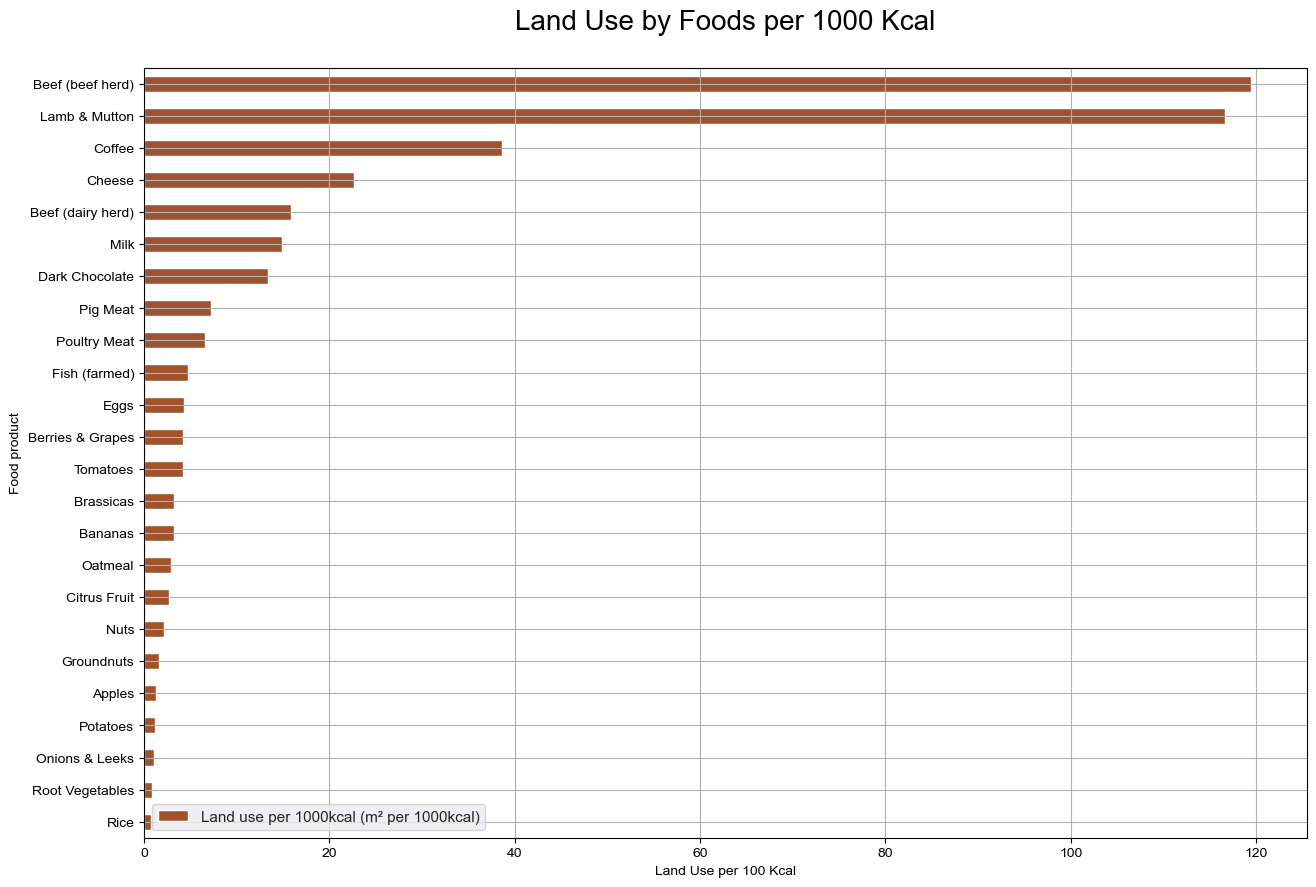

In [18]:
land_df= df.dropna().sort_values(by= 'Land use per 1000kcal (m² per 1000kcal)', ascending= True)[['Food product','Land use per 1000kcal (m² per 1000kcal)']]

fig, ax = plt.subplots(figsize=(15,10))
sns.set()
land_df.set_index('Food product').plot(kind='barh', stacked=True, ax= ax, color= "sienna")
plt.xlabel("Land Use per 100 Kcal")
plt.title("Land Use by Foods per 1000 Kcal\n", size= 20)
plt.show()

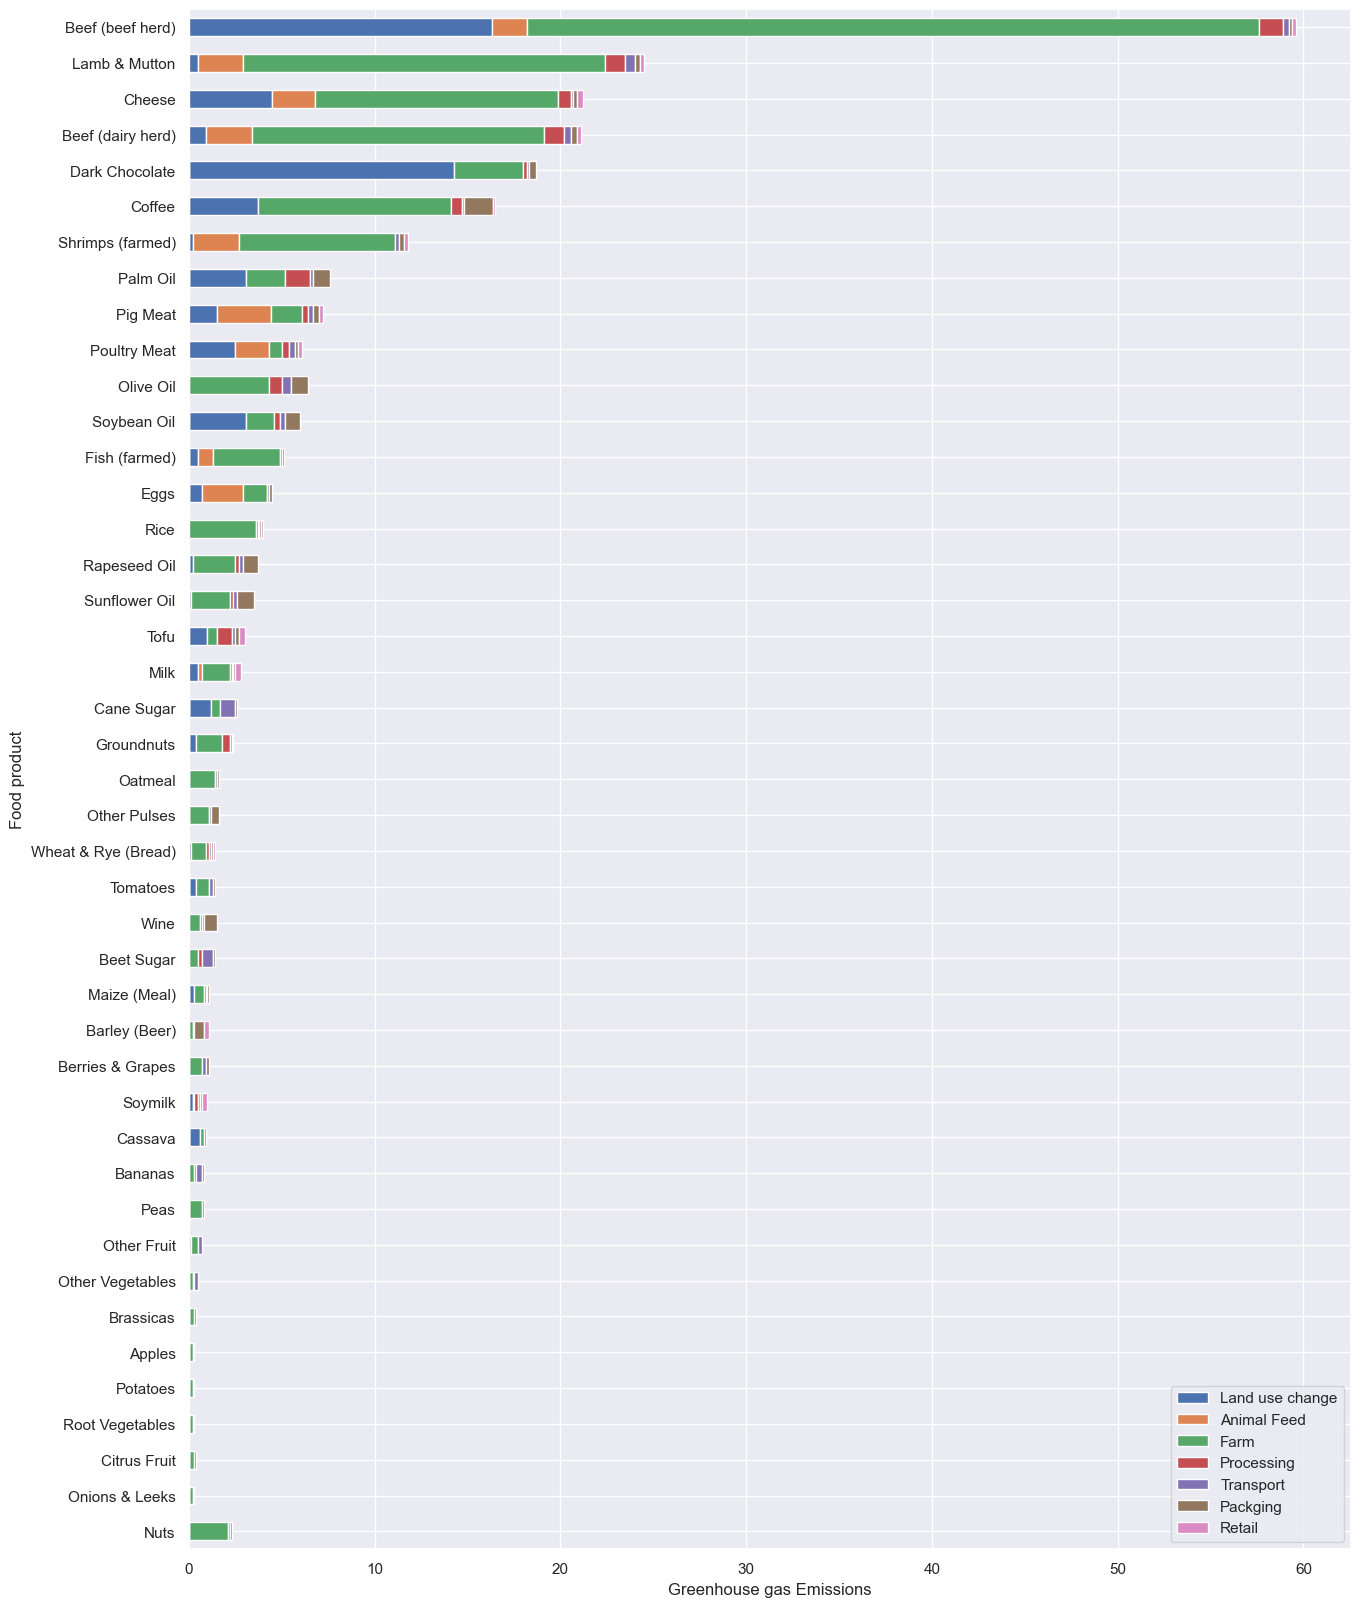

In [19]:
temp_df= df.sort_values(by= "Total_emissions", ascending= True).iloc[:,:8]

fig, ax = plt.subplots(figsize=(15,20))
sns.set()
temp_df.set_index('Food product').plot(kind='barh', stacked=True, ax= ax)
plt.xlabel("Greenhouse gas Emissions")
plt.show()

In [20]:
# Creating a food category column which we will retain for all following sections of this analysis.

df["Category"] = df["Food product"] # creating a new column with the exact list of [Food_Products]

# Setting various lists for different types of [Food_Products]
Grains = ["Wheat & Rye (Bread)", "Maize (Meal)", "Oatmeal", "Barley (Beer)", "Rice"]
Nuts = ['Nuts', 'Groundnuts']
Vegetables = ["Potatoes", "Cassava", 'Other Pulses',"Peas",'Tomatoes', 'Onions & Leeks','Root Vegetables',"Brassicas",'Other Vegetables']
Fruits = ['Citrus Fruit', 'Bananas','Apples', 'Berries & Grapes', 'Other Fruit']
Sugars = ['Cane Sugar', 'Beet Sugar',]
Oils = ['Soybean Oil', 'Palm Oil', 'Sunflower Oil', 'Rapeseed Oil', 'Olive Oil']
Dairy = ["Soymilk",'Milk', 'Cheese']
Animal_Products = ['Beef (beef herd)', 'Beef (dairy herd)','Lamb & Mutton', 'Pig Meat', 'Poultry Meat', 'Eggs', 'Fish (farmed)', 'Shrimps (farmed)']
Other = ["Tofu", "Coffee", "Dark Chocolate", "Wine"]

# Replacing all [Food_Products] in the newly developed column with their respective food [Category]
for i in df["Category"]:
    if i in Grains:
        df["Category"].replace([i], "Grains", inplace=True)
    elif i in Nuts:
        df["Category"].replace([i], "Nuts", inplace=True)
    elif i in Vegetables:
        df["Category"].replace([i], "Vegetables", inplace=True)
    elif i in Fruits:
        df["Category"].replace([i], "Fruits", inplace=True)
    elif i in Sugars:
        df["Category"].replace([i], "Sugar", inplace=True)
    elif i in Oils:
        df["Category"].replace([i], "Oils", inplace=True)
    elif i in Dairy:
        df["Category"].replace([i], "Dairy", inplace=True)
    elif i in Animal_Products:
        df["Category"].replace([i], "Animal_Products", inplace=True)
    elif i in Other:
        df["Category"].replace([i], "Other", inplace=True)

In [21]:
df.head(5)

,Food product,Land use change,Animal Feed,Farm,Processing,Transport,Packging,Retail,Total_emissions,Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal),...,Freshwater withdrawals per kilogram (liters per kilogram),Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal),Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein),Land use per 1000kcal (m² per 1000kcal),Land use per kilogram (m² per kilogram),Land use per 100g protein (m² per 100g protein),Scarcity-weighted water use per kilogram (liters per kilogram),Scarcity-weighted water use per 100g protein (liters per 100g protein),Scarcity-weighted water use per 1000kcal (liters per 1000 kilocalories),Category
0,Wheat & Rye (Bread),0.1,0.0,0.8,0.2,0.1,0.1,0.1,1.4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Grains
1,Maize (Meal),0.3,0.0,0.5,0.1,0.1,0.1,0.0,1.1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Grains
2,Barley (Beer),0.0,0.0,0.2,0.1,0.0,0.5,0.3,1.1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Grains
3,Oatmeal,0.0,0.0,1.4,0.0,0.1,0.1,0.0,1.6,4.281357,...,482.4,0.945482,1.907692,2.897446,7.6,5.846154,18786.2,14450.92308,7162.104461,Grains
4,Rice,0.0,0.0,3.6,0.1,0.1,0.1,0.1,4.0,9.514379,...,2248.4,1.207271,6.267606,0.759631,2.8,3.943662,49576.3,69825.77465,13449.891480,Grains


Text(0.5, 0.98, 'Greenhouse Emissions by Food Category')

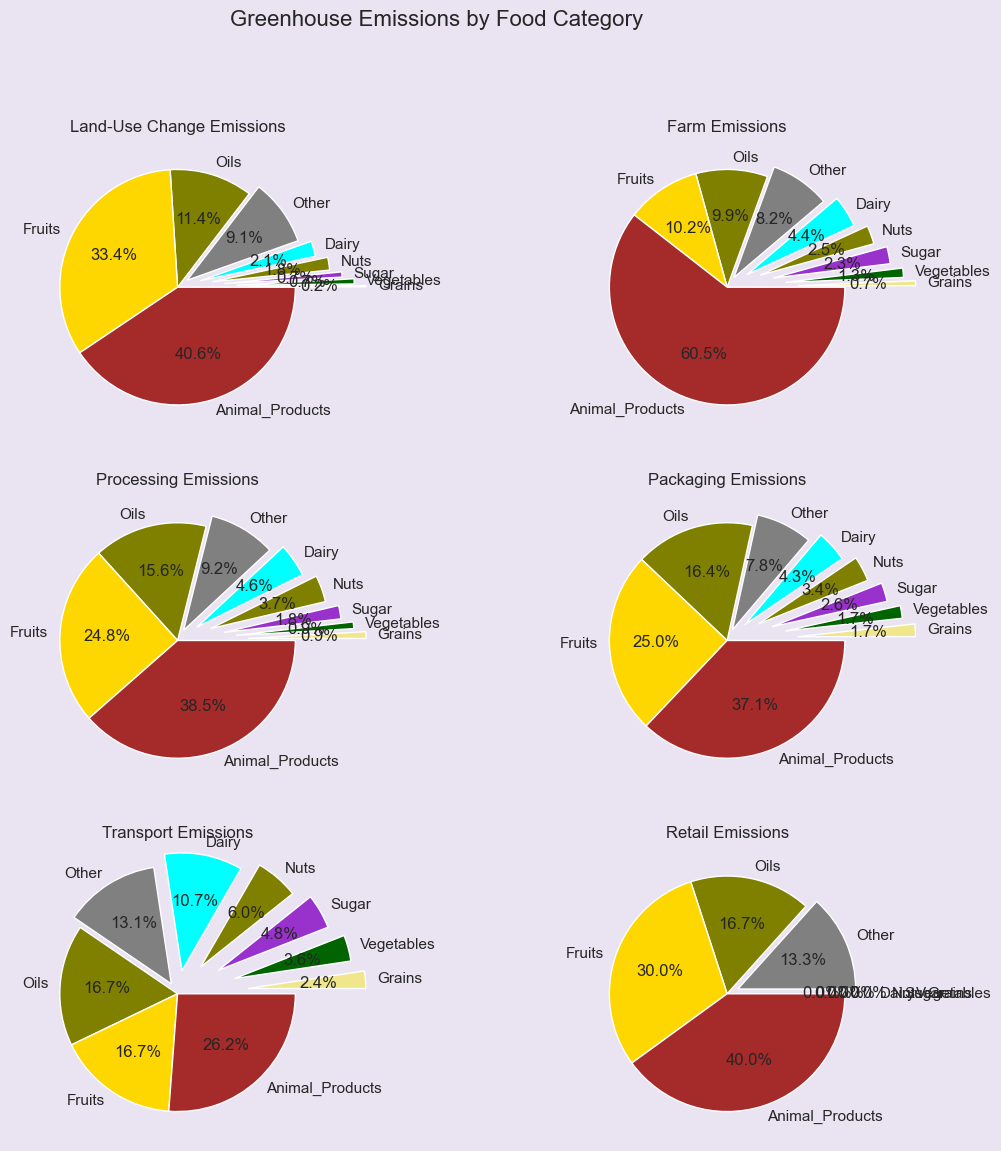

In [22]:
# Visualizing CO2 emissions in order of product value chain without a loop

Land_use_change = df.groupby(['Category'])['Land use change'].sum().sort_values()
Data_Farm = df.groupby(['Category'])['Farm'].sum().sort_values() 
Data_Processing = df.groupby(['Category'])['Processing'].sum().sort_values()
Data_Transport = df.groupby(['Category'])['Transport'].sum().sort_values()
Data_Packaging = df.groupby(['Category'])['Packging'].sum().sort_values()
Data_Retail = df.groupby(['Category'])['Retail'].sum().sort_values()

labels = list(df['Category'].unique())
color_vals = ["khaki", "darkgreen", "darkorchid", "olive", "aqua", "grey", "olive", "gold", "brown"]
explode_vals= [0.6,0.5,0.4,0.3,0.2,0.1,0,0,0]

fig, ((ax1,ax2), (ax3,ax4), (ax5, ax6)) = plt.subplots(3,2, figsize=(13,13),facecolor = '#eae4f2')

ax1.pie(Land_use_change, labels=labels, colors=color_vals, explode=explode_vals, autopct='%.1f%%')
ax1.set_title("Land-Use Change Emissions")
ax2.pie(Data_Farm, labels=labels, colors=color_vals, explode=explode_vals, autopct='%.1f%%')
ax2.set_title("Farm Emissions")
ax3.pie(Data_Processing, labels=labels, colors=color_vals, explode=explode_vals, autopct='%.1f%%')
ax3.set_title("Processing Emissions")
ax4.pie(Data_Packaging, labels=labels, colors=color_vals, explode=explode_vals, autopct='%.1f%%')
ax4.set_title("Packaging Emissions")
ax5.pie(Data_Transport, labels=labels, colors=color_vals, explode=explode_vals, autopct='%.1f%%')
ax5.set_title("Transport Emissions")
ax6.pie(Data_Retail, labels=labels, colors=color_vals, explode=explode_vals, autopct='%.1f%%')
ax6.set_title("Retail Emissions")

plt.suptitle('Greenhouse Emissions by Food Category',fontsize=16)

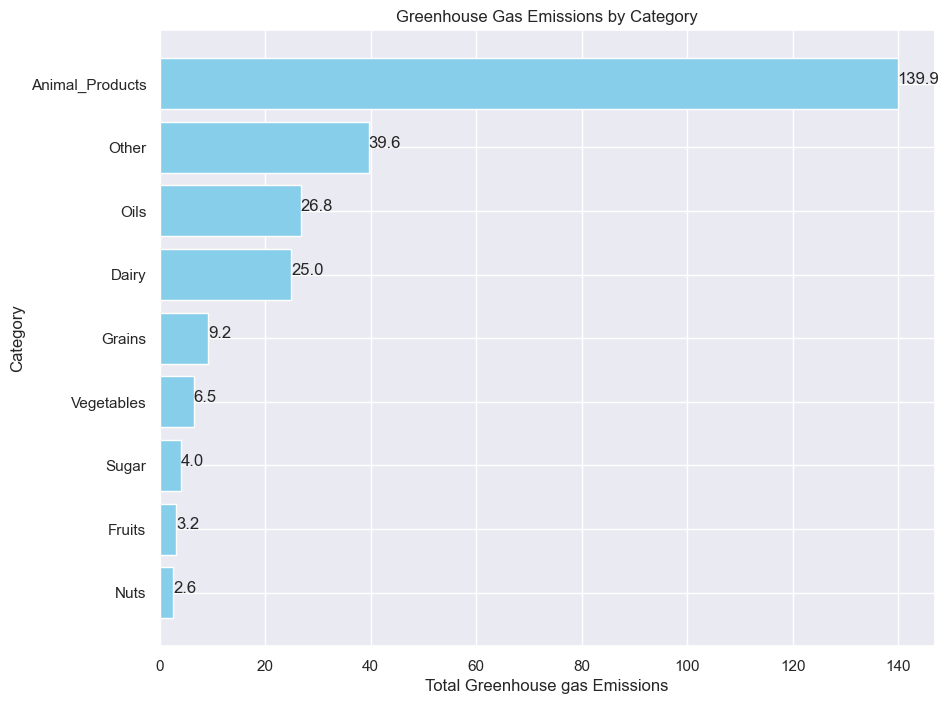

In [23]:
category_df = df.groupby('Category')['Total_emissions'].sum().sort_values()

# Plot a horizontal bar chart
plt.figure(figsize=(10, 8))
plt.barh(category_df.index, category_df.values, color='skyblue')

# Add annotations for the emissions values
for index, value in enumerate(category_df.values):
    plt.text(value, index, str(round(value, 2)))

# Set labels and title
plt.xlabel('Total Greenhouse gas Emissions')
plt.ylabel('Category')
plt.title('Greenhouse Gas Emissions by Category')

# Show plot
plt.show()

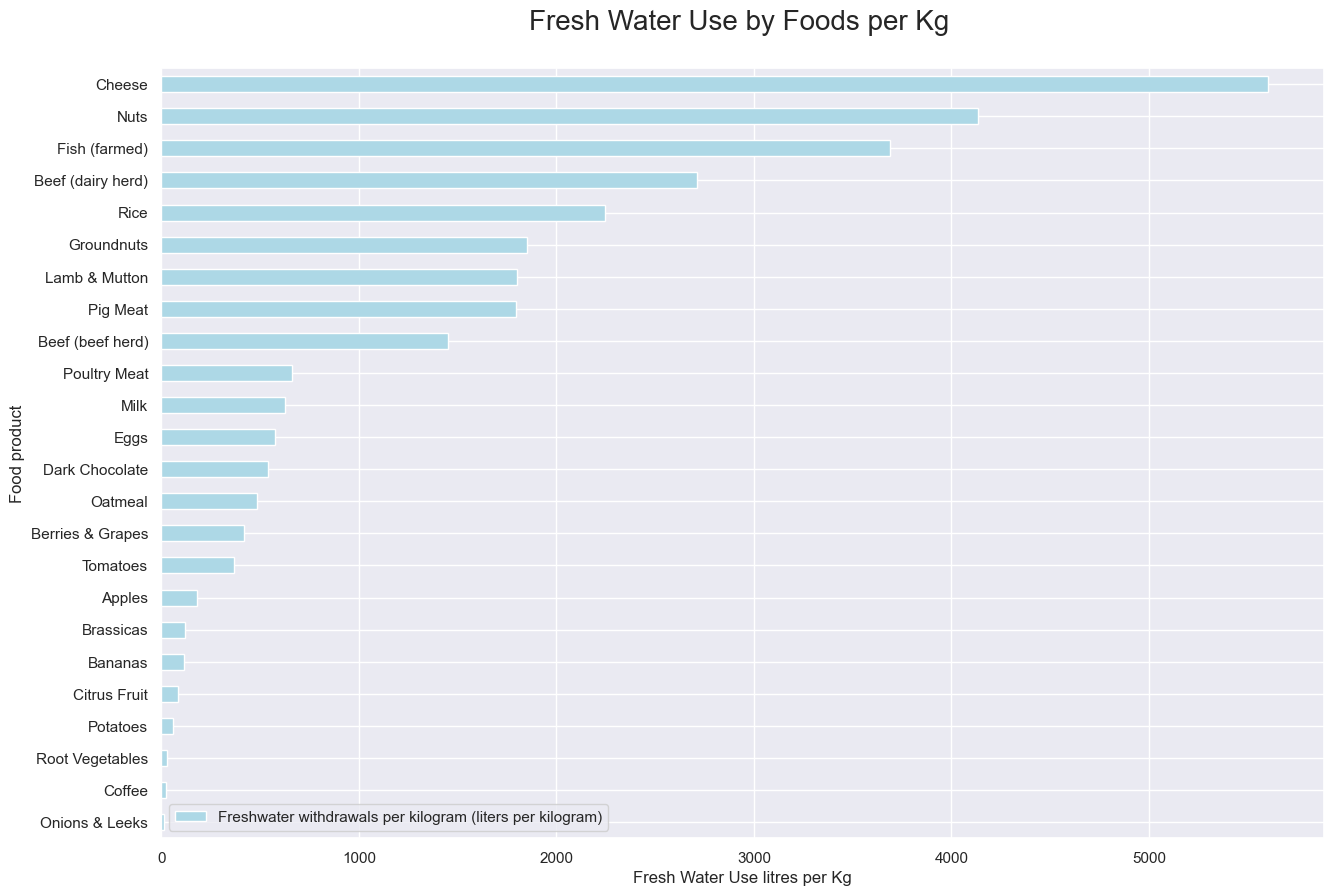

In [24]:
water_df= df.dropna().sort_values(by= 'Freshwater withdrawals per kilogram (liters per kilogram)', ascending= True)[['Food product',
       'Freshwater withdrawals per kilogram (liters per kilogram)']]

fig, ax = plt.subplots(figsize=(15,10))
sns.set()
water_df.set_index('Food product').plot(kind='barh', stacked=True, ax= ax, color= "lightblue")
plt.xlabel("Fresh Water Use litres per Kg")
plt.title("Fresh Water Use by Foods per Kg \n", size= 20)
plt.show()

D:\Software\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning:

Glyph 8324 (\N{SUBSCRIPT FOUR}) missing from current font.



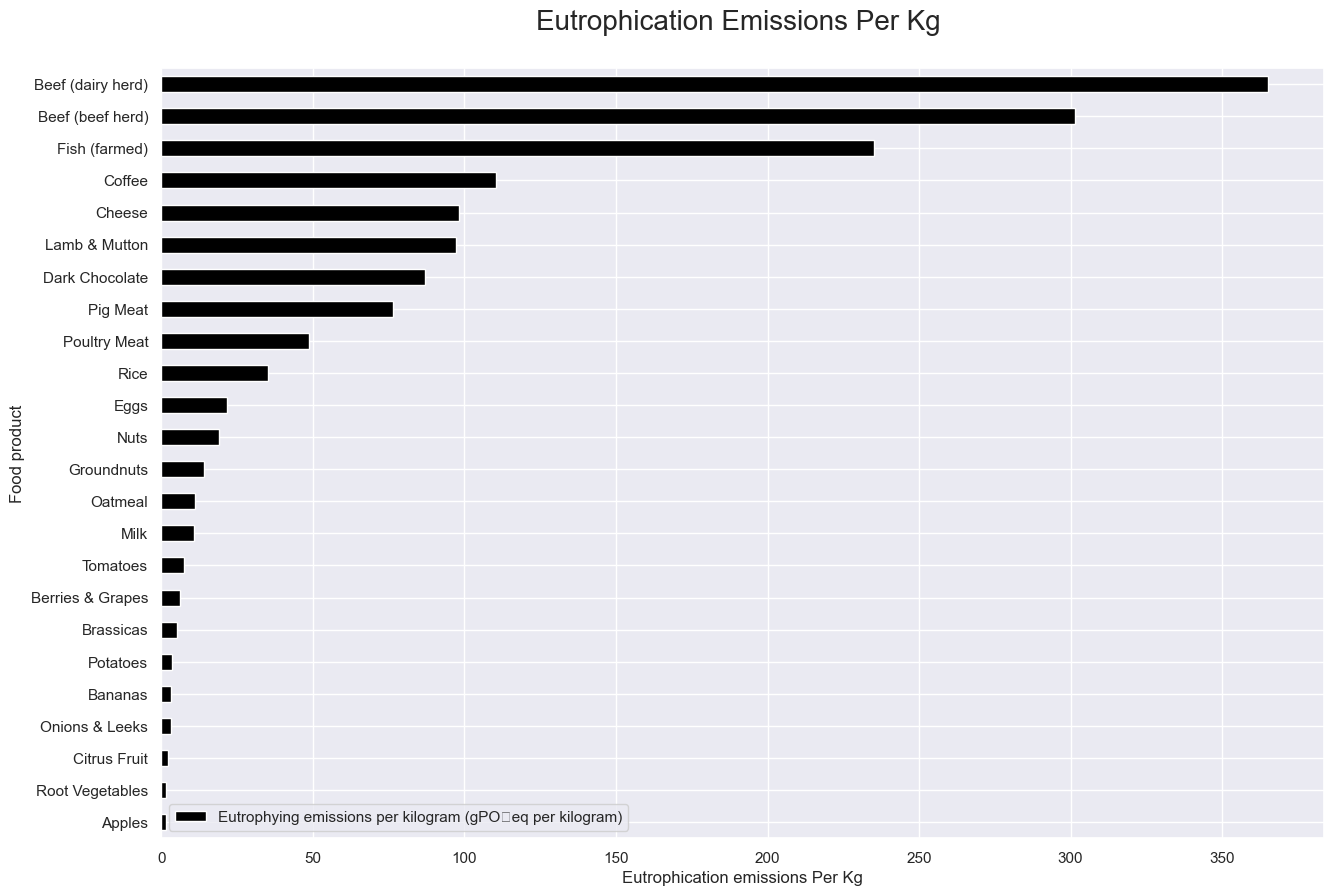

In [25]:
eutrophication_df= df.dropna().sort_values(by= 'Eutrophying emissions per kilogram (gPO₄eq per kilogram)', ascending= True)[['Food product',
       'Eutrophying emissions per kilogram (gPO₄eq per kilogram)']]

fig, ax = plt.subplots(figsize=(15,10))
sns.set()
eutrophication_df.set_index('Food product').plot(kind='barh', stacked=True, ax= ax, color= "black")
plt.xlabel('Eutrophication emissions Per Kg')
plt.title('Eutrophication Emissions Per Kg \n', size= 20)
plt.show()

D:\Software\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning:

Glyph 8322 (\N{SUBSCRIPT TWO}) missing from current font.



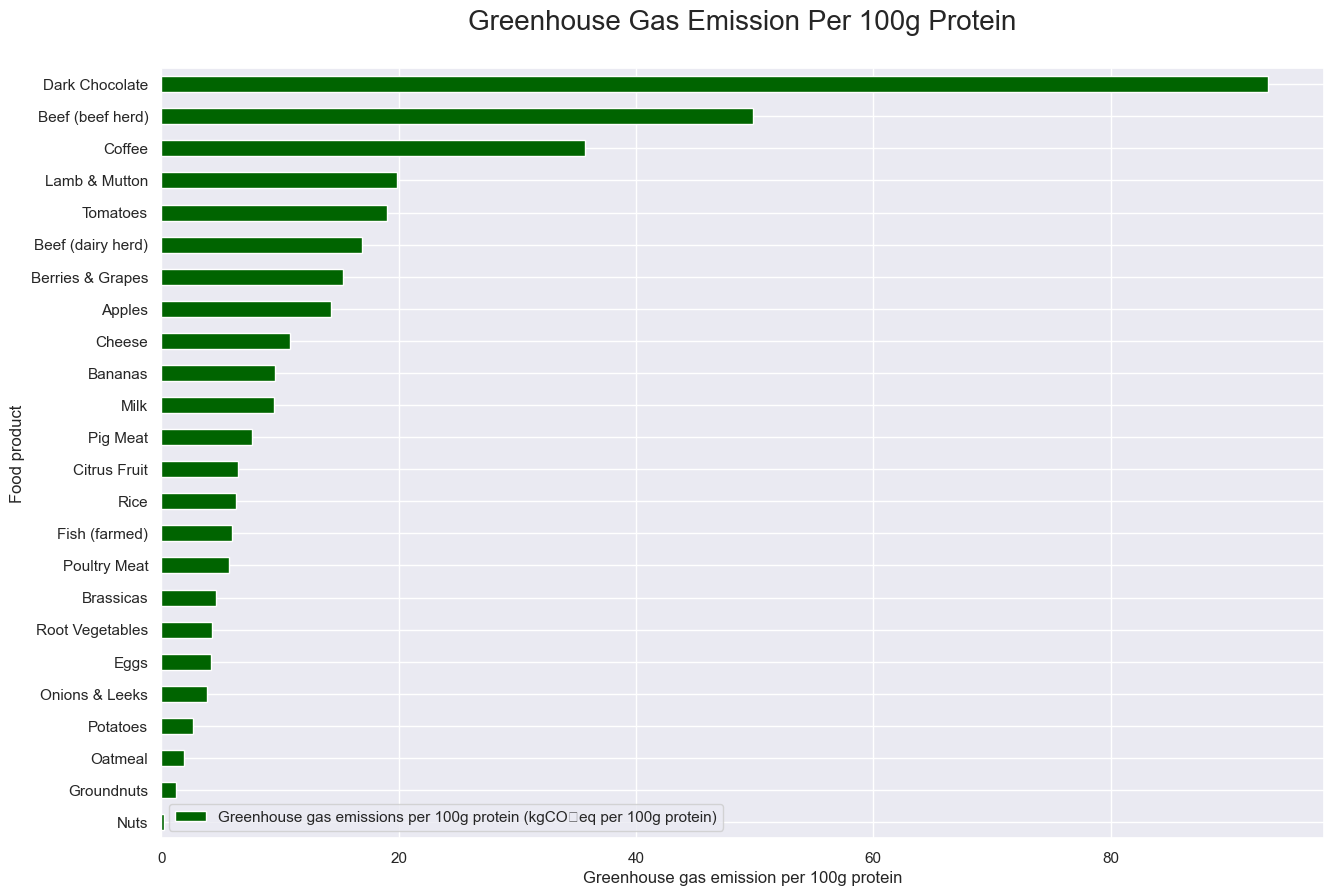

In [26]:
emission_df= df.dropna().sort_values(by= 'Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein)', ascending= True)[['Food product',
       'Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein)']]

fig, ax = plt.subplots(figsize=(15,10))
sns.set()
emission_df.set_index('Food product').plot(kind='barh', stacked=True, ax= ax, color= "darkgreen")
plt.xlabel("Greenhouse gas emission per 100g protein")
plt.title("Greenhouse Gas Emission Per 100g Protein\n", size= 20)
plt.show()

D:\Software\Anaconda\Lib\site-packages\seaborn\utils.py:80: UserWarning:

Glyph 8324 (\N{SUBSCRIPT FOUR}) missing from current font.

D:\Software\Anaconda\Lib\site-packages\seaborn\utils.py:80: UserWarning:

Glyph 8322 (\N{SUBSCRIPT TWO}) missing from current font.

D:\Software\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning:

Glyph 8324 (\N{SUBSCRIPT FOUR}) missing from current font.

D:\Software\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning:

Glyph 8322 (\N{SUBSCRIPT TWO}) missing from current font.



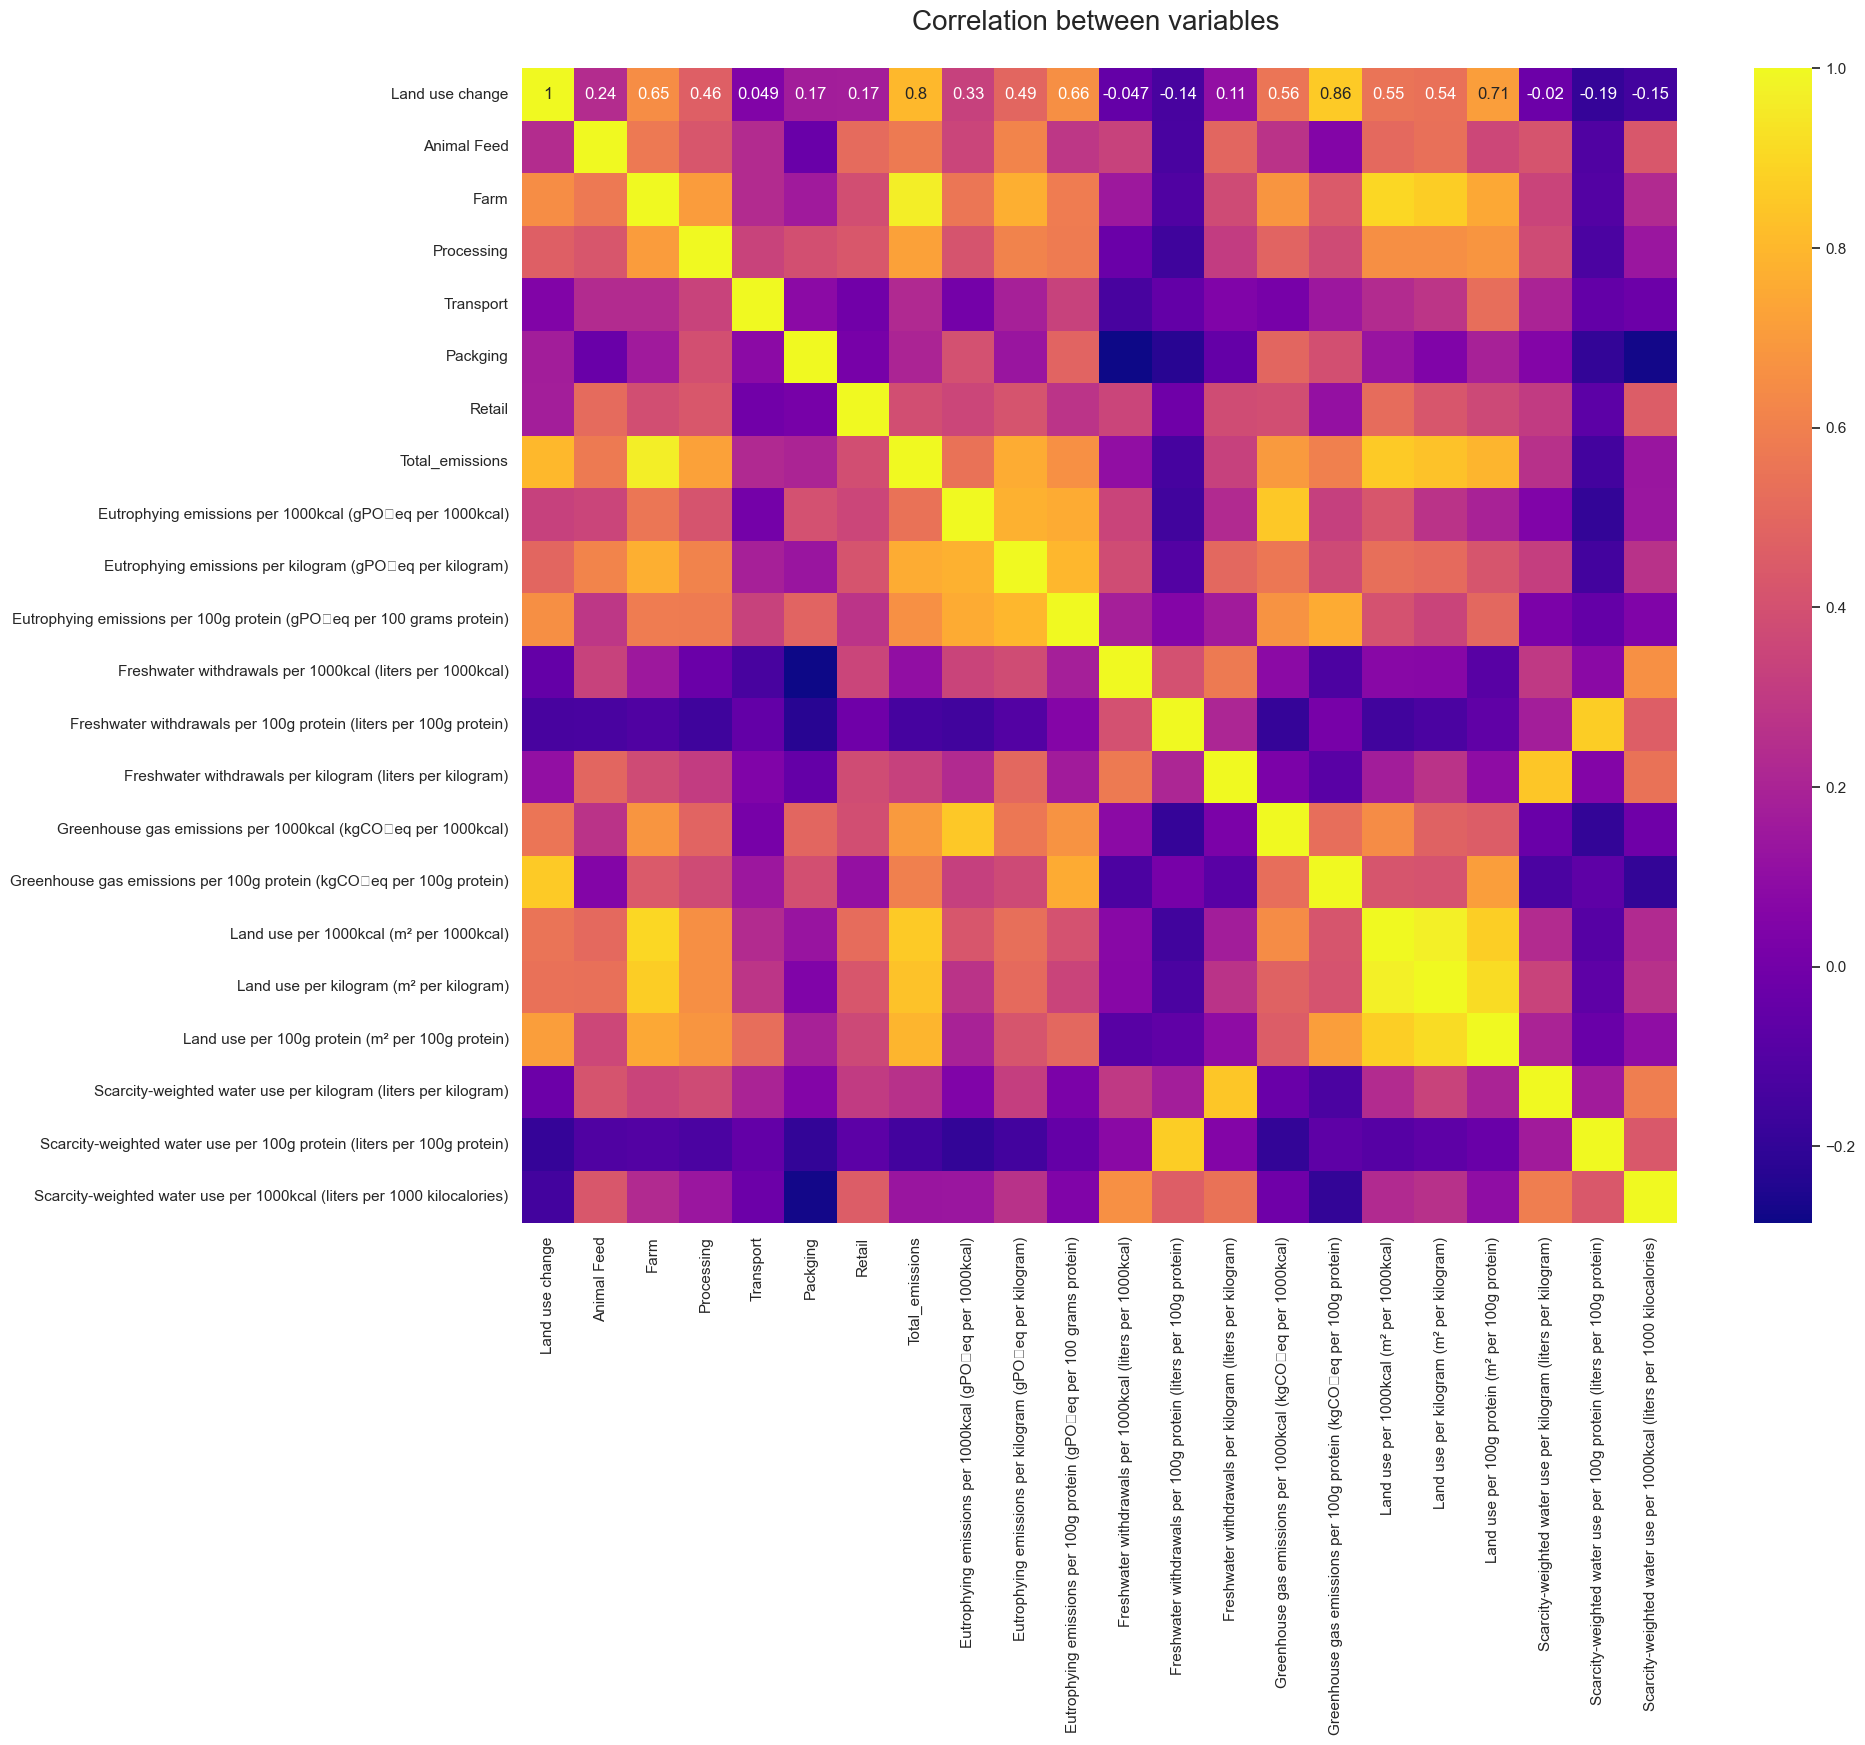

In [27]:
#Correlation shows relations between values. Closer to 1 means a strong pair, 0 neutral and -1 weak pair
#Eg Farm

# Identify non-numeric columns
non_numeric_columns = df.select_dtypes(exclude=['number']).columns

# Drop non-numeric columns from the DataFrame
df_numeric = df.drop(columns=non_numeric_columns)

# Calculate the correlation matrix
corrmat = df_numeric.corr(method='pearson')

# Create a heatmap
f, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(corrmat, vmax=1., square=True, annot=True, cmap="plasma")
plt.title("Correlation between variables \n", fontsize=20)
plt.show()

In [28]:
new_df = df.copy()

In [29]:
#First, let us scout for negative values in our dataset and, if detected, determine how to proceed with the analysis.

new_df_numeric = new_df.select_dtypes('number')
neg_values = (new_df_numeric<0).sum().sum()

print(f"Number of negative values in the dataset: {neg_values}")

Number of negative values in the dataset: 0


In [30]:
# MICE imputation
#Each variable imputed by a separate model

# Retrieving numeric columns
df_numeric = new_df.select_dtypes('number') # a more explicit option to select numeric columns
df_mice = df_numeric.copy(deep=True)

# Importing necessary libraries
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge

# We will choose the default model used by the MICE algorithm: the Bayesian Ridge model.
mice_imputer = IterativeImputer(
    missing_values = np.nan,
    estimator = BayesianRidge(), 
    initial_strategy = 'mean',   
    imputation_order = 'ascending',
    verbose = 1,
    max_iter = 9)

df_mice = pd.DataFrame(mice_imputer.fit_transform(df_mice), columns = df_mice.columns)
df_mice.insert(0,"Food_Product",new_df["Food product"])
df_mice.insert(1,"Category", new_df["Category"])

df_mice_na_sum = df_mice.isna().sum().sum()

[IterativeImputer] Completing matrix with shape (43, 22)
[IterativeImputer] Change: 37380.07930115055, scaled tolerance: 431.62 
[IterativeImputer] Change: 1710.7499297604745, scaled tolerance: 431.62 
[IterativeImputer] Change: 259.6298655784351, scaled tolerance: 431.62 
[IterativeImputer] Early stopping criterion reached.


In [31]:
df_mice.head(10)

,Food_Product,Category,Land use change,Animal Feed,Farm,Processing,Transport,Packging,Retail,Total_emissions,...,Freshwater withdrawals per 100g protein (liters per 100g protein),Freshwater withdrawals per kilogram (liters per kilogram),Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal),Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein),Land use per 1000kcal (m² per 1000kcal),Land use per kilogram (m² per kilogram),Land use per 100g protein (m² per 100g protein),Scarcity-weighted water use per kilogram (liters per kilogram),Scarcity-weighted water use per 100g protein (liters per 100g protein),Scarcity-weighted water use per 1000kcal (liters per 1000 kilocalories)
0,Wheat & Rye (Bread),Grains,0.1,0.0,0.8,0.2,0.1,0.1,0.1,1.4,...,1329.336296,925.604767,6.322143,14.427230,10.084988,23.260201,28.311430,36457.758533,52311.683639,16204.170900
1,Maize (Meal),Grains,0.3,0.0,0.5,0.1,0.1,0.1,0.0,1.1,...,1329.310812,924.511950,6.291152,14.709430,9.888543,22.759546,28.696021,36448.357557,52310.234471,16202.894240
2,Barley (Beer),Grains,0.0,0.0,0.2,0.1,0.0,0.5,0.3,1.1,...,1329.297095,924.461399,6.408858,14.692604,9.862158,22.449250,28.671402,36439.882520,52308.820068,16201.794705
3,Oatmeal,Grains,0.0,0.0,1.4,0.0,0.1,0.1,0.0,1.6,...,371.076923,482.400000,0.945482,1.907692,2.897446,7.600000,5.846154,18786.200000,14450.923080,7162.104461
4,Rice,Grains,0.0,0.0,3.6,0.1,0.1,0.1,0.1,4.0,...,3166.760563,2248.400000,1.207271,6.267606,0.759631,2.800000,3.943662,49576.300000,69825.774650,13449.891480
5,Potatoes,Vegetables,0.0,0.0,0.2,0.0,0.1,0.0,0.0,0.3,...,347.647059,59.100000,0.628415,2.705882,1.202186,0.880000,5.176471,2754.200000,16201.176470,3762.568306
6,Cassava,Vegetables,0.6,0.0,0.2,0.0,0.1,0.0,0.0,0.9,...,1209.854196,0.000000,1.355236,14.666667,1.858316,1.810000,20.111111,0.000000,45619.024077,11156.212699
7,Cane Sugar,Sugar,1.2,0.0,0.5,0.0,0.8,0.1,0.0,2.6,...,969.501131,620.100000,0.911681,18.286692,0.581197,2.040000,25.393955,16438.600000,29551.364676,4683.361823
8,Beet Sugar,Sugar,0.0,0.0,0.5,0.2,0.6,0.1,0.0,1.4,...,912.602969,217.700000,0.515670,17.197052,0.521368,1.830000,24.336308,9493.300000,26101.582978,2704.643875
9,Other Pulses,Vegetables,0.0,0.0,1.1,0.0,0.1,0.4,0.0,1.6,...,203.503036,435.700000,0.524927,0.836058,4.565982,15.570000,7.272303,22477.400000,10498.552080,11487.403188


In [32]:
df_mice.isnull().any()

Food_Product                                                               False
Category                                                                   False
Land use change                                                            False
Animal Feed                                                                False
Farm                                                                       False
Processing                                                                 False
Transport                                                                  False
Packging                                                                   False
Retail                                                                     False
Total_emissions                                                            False
Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal)                   False
Eutrophying emissions per kilogram (gPO₄eq per kilogram)                   False
Eutrophying emissions per 10

In [33]:
df_mice.fillna(0)
df_mice.isnull().sum()

Food_Product                                                               0
Category                                                                   0
Land use change                                                            0
Animal Feed                                                                0
Farm                                                                       0
Processing                                                                 0
Transport                                                                  0
Packging                                                                   0
Retail                                                                     0
Total_emissions                                                            0
Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal)                   0
Eutrophying emissions per kilogram (gPO₄eq per kilogram)                   0
Eutrophying emissions per 100g protein (gPO₄eq per 100 grams protein)      0

In [34]:
columns_to_drop = (['Food_Product','Category'])
train_df = df_mice.drop(columns=columns_to_drop)

In [35]:
#Features
#loc[what rows, what cols]
X = train_df.loc[:,train_df.columns != 'Total_emissions']
#Response
y = train_df['Total_emissions']

In [36]:
train_df.head()

,Land use change,Animal Feed,Farm,Processing,Transport,Packging,Retail,Total_emissions,Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal),Eutrophying emissions per kilogram (gPO₄eq per kilogram),...,Freshwater withdrawals per 100g protein (liters per 100g protein),Freshwater withdrawals per kilogram (liters per kilogram),Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal),Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein),Land use per 1000kcal (m² per 1000kcal),Land use per kilogram (m² per kilogram),Land use per 100g protein (m² per 100g protein),Scarcity-weighted water use per kilogram (liters per kilogram),Scarcity-weighted water use per 100g protein (liters per 100g protein),Scarcity-weighted water use per 1000kcal (liters per 1000 kilocalories)
0,0.1,0.0,0.8,0.2,0.1,0.1,0.1,1.4,35.015477,33.166902,...,1329.336296,925.604767,6.322143,14.427230,10.084988,23.260201,28.311430,36457.758533,52311.683639,16204.170900
1,0.3,0.0,0.5,0.1,0.1,0.1,0.0,1.1,34.725033,31.308839,...,1329.310812,924.511950,6.291152,14.709430,9.888543,22.759546,28.696021,36448.357557,52310.234471,16202.894240
2,0.0,0.0,0.2,0.1,0.0,0.5,0.3,1.1,35.565168,31.063940,...,1329.297095,924.461399,6.408858,14.692604,9.862158,22.449250,28.671402,36439.882520,52308.820068,16201.794705
3,0.0,0.0,1.4,0.0,0.1,0.1,0.0,1.6,4.281357,11.230000,...,371.076923,482.400000,0.945482,1.907692,2.897446,7.600000,5.846154,18786.200000,14450.923080,7162.104461
4,0.0,0.0,3.6,0.1,0.1,0.1,0.1,4.0,9.514379,35.070000,...,3166.760563,2248.400000,1.207271,6.267606,0.759631,2.800000,3.943662,49576.300000,69825.774650,13449.891480


In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X , y,  test_size=0.10, random_state=42) 

In [38]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [39]:
#Initialize the model
Dt_Regressor = DecisionTreeRegressor(random_state=42)
# Fit the model on training set
Dt_Regressor.fit(X_train_scaled, y_train)
#  make prediction on testing set
y_pred_dt = Dt_Regressor.predict(X_test_scaled)

In [40]:
accu_dt = r2_score(y_pred_dt, y_test)

# Print the prediction accuracy
print('Test R2 score Decision Tree Regressor :', accu_dt)

Test R2 score Decision Tree Regressor : 0.9027974454437182


In [41]:
#Initialize the model
Rf_Regressor = RandomForestRegressor(n_estimators = 100, random_state=42)
# Fit the model on training set
Rf_Regressor.fit(X_train_scaled, y_train)
#  make prediction on testing set
y_pred_rf = Rf_Regressor.predict(X_test_scaled)

In [42]:
accu_rf = r2_score(y_pred_rf, y_test)

# Print the prediction accuracy
print('Test R2 score Random Forest Regressor :', accu_rf)

Test R2 score Random Forest Regressor : 0.9040587359711105


In [43]:
#Initialize the model
Ab_Regressor = AdaBoostRegressor(n_estimators = 100, random_state=42)
# Fit the model on training set
Ab_Regressor.fit(X_train_scaled, y_train)
#  make prediction on testing set
y_pred_ab = Ab_Regressor.predict(X_test_scaled)

In [44]:
accu_ab = r2_score(y_pred_ab, y_test)

# Print the prediction accuracy
print('Test R2 score AdaBoost Regressor :', accu_ab)

Test R2 score AdaBoost Regressor : 0.9605678384578679


In [45]:
#Initialize the model
Knn_Regressor = KNeighborsRegressor()
# Fit the model on training set
Knn_Regressor.fit(X_train_scaled, y_train)
#  make prediction on testing set
y_pred_knn = Knn_Regressor.predict(X_test_scaled)

In [46]:
accu_knn = r2_score(y_pred_knn, y_test)
accu_knn = abs(accu_knn)
# Print the prediction accuracy
print('Test R2 score K-nearest Neighbour Regressor :', (accu_knn))

Test R2 score K-nearest Neighbour Regressor : 0.32432082041630494


In [47]:
Default_Accuracies = pd.Series([accu_knn,accu_dt, accu_rf, accu_ab,  ])
Model_Names = ['KNN Regressor','DecisionTree Regressor','RandomForest Regressor' ,'AdaBoost Regressor' ,]

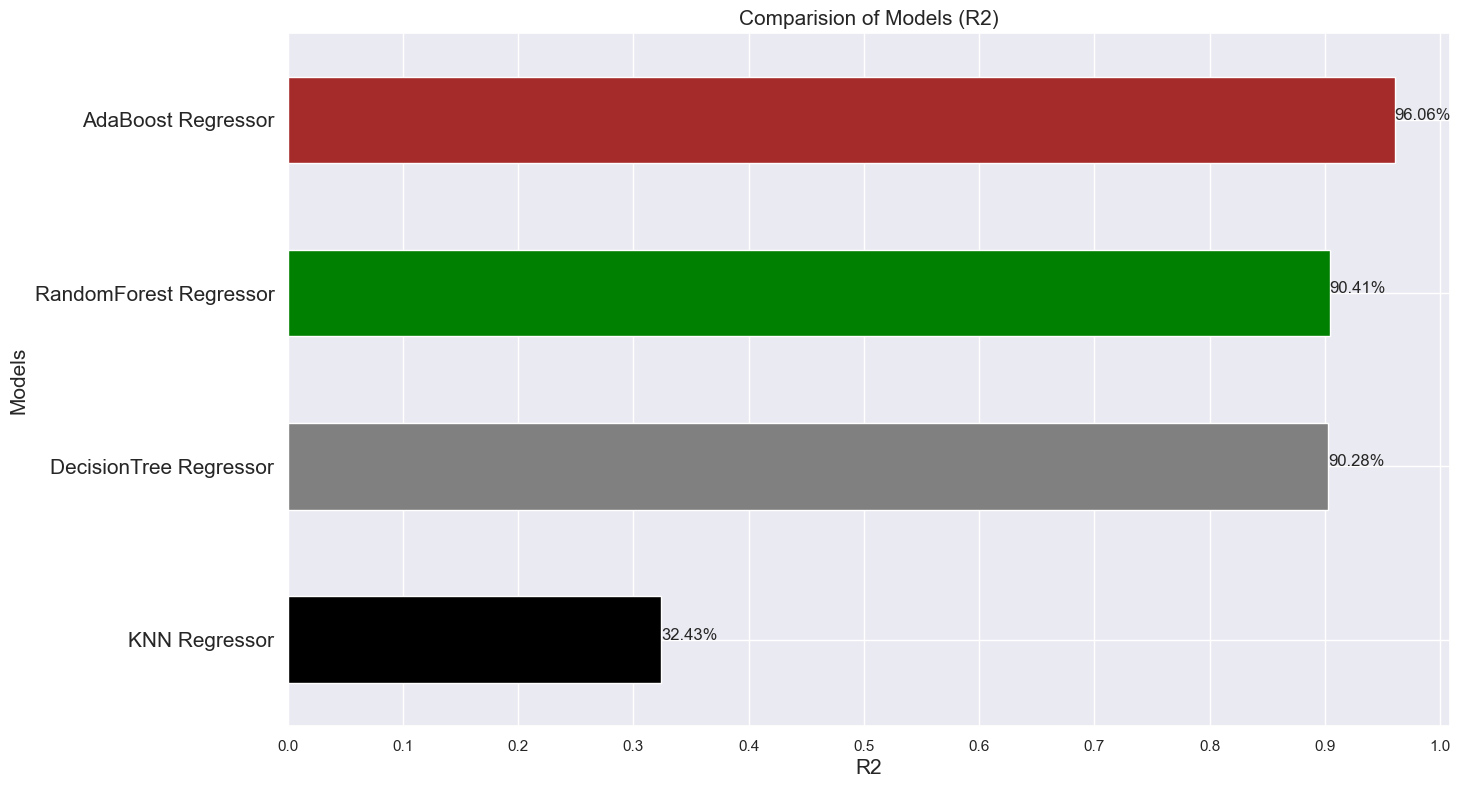

In [48]:
ax = Default_Accuracies.plot(kind = 'barh',figsize=(15,9),color=['black','gray','green','brown','pink','blue','red'])
ax.set_title('Comparision of Models (R2)',fontsize=15)
ax.set_xticks([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
ax.set_yticklabels(Model_Names,fontsize=15,)
ax.set_ylabel("Models",fontsize=15)
ax.set_xlabel("R2",fontsize=15)
[ax.text(v, i, '{:.2f}%'.format(100*v)) for i, v in enumerate(Default_Accuracies)];
plt.show()

In [49]:
from sklearn.metrics import mean_squared_error

Mean Squared Error: 2.169101153961056


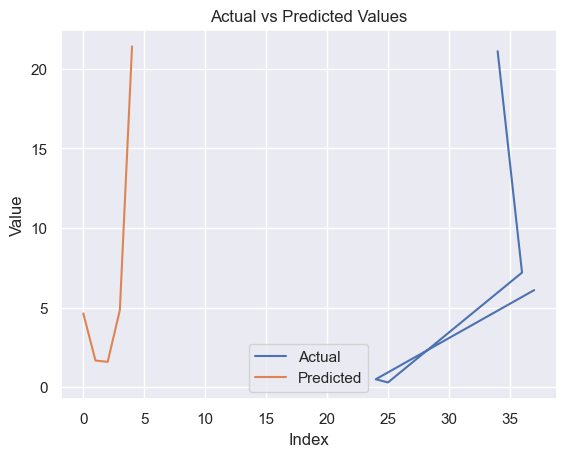

In [50]:
# Evaluate the model using Mean Squared Error
mse = mean_squared_error(y_test, y_pred_ab)
print("Mean Squared Error:", mse)

plt.plot(y_test, label='Actual')
plt.plot(y_pred_ab, label='Predicted')
plt.title('Actual vs Predicted Values')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.show()
